# Paper Example

This notebook demonstrates the core concepts of the Genetic AI algorithm using a real-world dataset.

## 1. Imports and Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from pikaia.data import PikaiaPopulation
from pikaia.models import PikaiaModel
from pikaia.plotting import PikaiaPlotter, PlotType
from pikaia.preprocessing import PikaiaPreprocessor, max_scaler
from pikaia.schemas import (
    FeatureType,
    GeneStrategyEnum,
    OrgStrategyEnum,
)
from pikaia.strategies import GeneStrategyFactory, OrgStrategyFactory

## 2. Data Definition

We define the raw data as a numpy array `X`. Each row represents an apartment and the columns are: Rent, Size, Rooms, and Balcony.

In [ ]:
# Raw data (Rent, Size, Rooms, Balcony)
X = np.array(
    [
        [4348, 138, 3.0, 0],
        [2647, 133, 4.0, 0],
        [7413, 460, 7.0, 0],
        [5644, 329, 6.0, 0],
        [5979, 252, 6.0, 1],
        [5016, 219, 6.0, 0],
        [1106, 123, 2.0, 0],
        [4409, 175, 5.0, 0],
        [7708, 230, 8.0, 0],
        [5143, 159, 4.0, 0],
        [1650, 133, 3.0, 0],
        [7933, 383, 14.5, 1],
        [7912, 314, 7.0, 0],
        [8442, 335, 7.0, 0],
        [3218, 165, 3.0, 0],
    ],
    dtype=np.float64,
)
gene_labels = ["Rent", "Size", "Rooms", "Balcony"]

## 3. Data Preprocessing

In [4]:
feature_types = [
    FeatureType.COST,  # Rent
    FeatureType.GAIN,  # Size
    FeatureType.GAIN,  # Rooms
    FeatureType.GAIN,  # Balcony
]
feature_transforms = [max_scaler] * 4
preprocessor = PikaiaPreprocessor(
    num_features=X.shape[1],
    feature_types=feature_types,
    feature_transforms=feature_transforms,
)

# Create PikaiaPopulation
phi = PikaiaPopulation(preprocessor.fit_transform(X))

In [5]:
display(phi.matrix)

array([[0.61596778, 0.3       , 0.20689655, 0.        ],
       [0.81746032, 0.28913043, 0.27586207, 0.        ],
       [0.25290216, 1.        , 0.48275862, 0.        ],
       [0.46244966, 0.71521739, 0.4137931 , 0.        ],
       [0.42276712, 0.54782609, 0.4137931 , 1.        ],
       [0.53683961, 0.47608696, 0.4137931 , 0.        ],
       [1.        , 0.2673913 , 0.13793103, 0.        ],
       [0.608742  , 0.38043478, 0.34482759, 0.        ],
       [0.21795783, 0.5       , 0.55172414, 0.        ],
       [0.52179578, 0.34565217, 0.27586207, 0.        ],
       [0.93556029, 0.28913043, 0.20689655, 0.        ],
       [0.19130538, 0.8326087 , 1.        , 1.        ],
       [0.19379294, 0.6826087 , 0.48275862, 0.        ],
       [0.13101161, 0.72826087, 0.48275862, 0.        ],
       [0.74982232, 0.35869565, 0.20689655, 0.        ]])

## 4. Model Setup and Fitting

In [6]:
gene_strategies = [GeneStrategyFactory.get_strategy(GeneStrategyEnum.DOMINANT)]
org_strategies = [OrgStrategyFactory.get_strategy(OrgStrategyEnum.BALANCED)]

In [7]:
model_iterative = PikaiaModel(
    population=phi,
    gene_strategies=gene_strategies,
    org_strategies=org_strategies,
    max_iter=10,
)
model_iterative.fit()

2025-09-29 12:38:04,622 - pikaia - INFO - Running simulation for up to 10 iterations.
2025-09-29 12:38:04,622 - pikaia - INFO - Starting evolutionary simulation for up to 10 iterations.
2025-09-29 12:38:04,624 - pikaia - INFO - Completed all 10 iterations without reaching ESE. Total time: 0.0016 seconds.
2025-09-29 12:38:04,624 - pikaia - INFO - Total fit process time: 0.0022 seconds.


In [8]:
gene_fitness_iterative = model_iterative._gene_fitness_hist[-1, :]
org_fitness_iterative = model_iterative._org_fitness_hist[-1, :]

print(
    "Iterative model fitness values:"
    f"\nGene Fitness:\n\t{gene_fitness_iterative}"
    f"\nOrganism Fitness:\n\t{org_fitness_iterative}"
)

Iterative model fitness values:
Gene Fitness:
	[0.22169228 0.22086395 0.24916715 0.30827662]
Organism Fitness:
	[0.25436631 0.3138189  0.39721799 0.3635909  0.62609951 0.32726729
 0.31511726 0.30489744 0.29622307 0.26075597 0.32281681 0.78374794
 0.31401364 0.31017842 0.29700458]


In [9]:
model_analytical = PikaiaModel(
    population=phi,
    gene_strategies=gene_strategies,
    org_strategies=org_strategies,
)
model_analytical.fit()

2025-09-29 12:38:04,639 - pikaia - WARNING - gene_strategies is ignored when max_iter is None (default)
2025-09-29 12:38:04,640 - pikaia - WARNING - org_strategies is ignored when max_iter is None (default)
2025-09-29 12:38:04,640 - pikaia - INFO - No max iterations set, solving for optimal solution directly.
2025-09-29 12:38:04,640 - pikaia - INFO - Total fit process time: 0.0002 seconds.


In [10]:
gene_fitness_analytical = model_analytical._gene_fitness_hist[-1, :]
org_fitness_analytical = model_analytical._org_fitness_hist[-1, :]

print(
    "Analytical model fitness values:"
    f"\nGene Fitness:\n\t{gene_fitness_analytical}"
    f"\nOrganism Fitness:\n\t{org_fitness_analytical}"
)

Analytical model fitness values:
Gene Fitness:
	[0.21170572 0.21094494 0.23954781 0.33780154]
Organism Fitness:
	[0.243249   0.30013378 0.38012954 0.34789796 0.64198812 0.31320338
 0.30115164 0.29172765 0.2837797  0.24946288 0.30861568 0.79348438
 0.30066369 0.29700262 0.28396832]


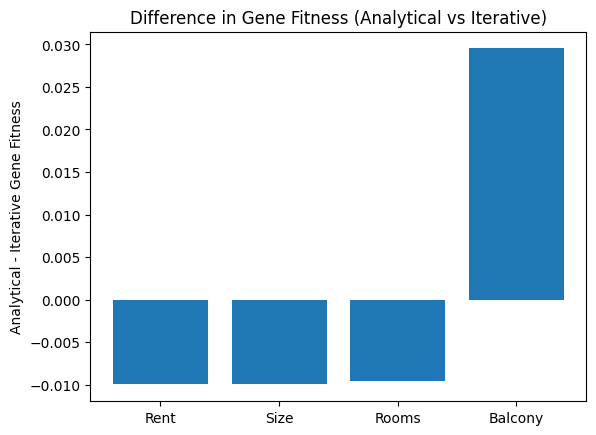

In [11]:
import matplotlib.pyplot as plt

diff = gene_fitness_analytical - gene_fitness_iterative
plt.bar(gene_labels, diff)
plt.ylabel("Analytical - Iterative Gene Fitness")
plt.title("Difference in Gene Fitness (Analytical vs Iterative)")
plt.show()

# 5. Results and Visualization

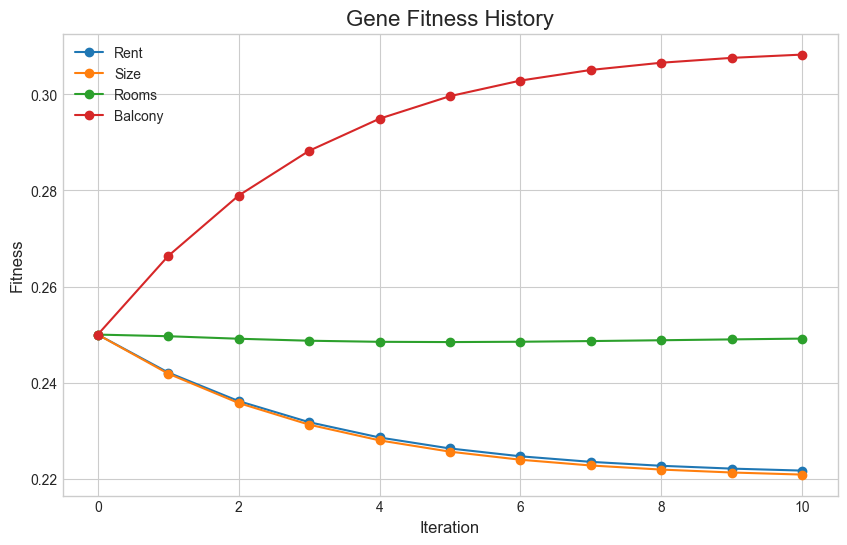

In [12]:
plotter_interative = PikaiaPlotter(model_iterative)
_ = plotter_interative.plot(
    plot_type=PlotType.GENE_FITNESS_HISTORY,
    show=True,
    gene_labels=gene_labels,
)

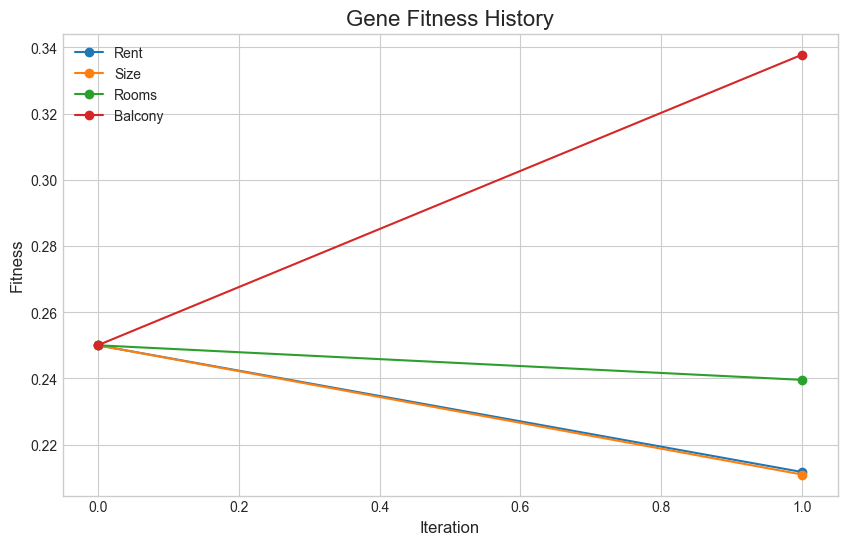

In [13]:
plotter_analytical = PikaiaPlotter(model_analytical)
_ = plotter_analytical.plot(
    plot_type=PlotType.GENE_FITNESS_HISTORY,
    show=True,
    gene_labels=gene_labels,
)

## 7. Impact Norms

We calculate two types of impact norms:

- **Overall Impact Norm (`||Φ||`):** This measures the overall influence of the features on the final ranking.
- **Qualified Impact Norm (`||Φ||_*`):** This measures the impact on the top 10% of the population, providing insight into the features that are most important for the best-performing agents.

In [14]:
# Impact Norms
n = phi.N
m = phi.M
uniform = np.ones(m) / m

# Overall impact norm
col_means = phi.matrix.mean(axis=0)
impact_norm = (
    m / (m - 1) * np.sum(np.abs(gene_fitness_analytical - uniform) * col_means)
)

# Qualified impact norm
row_means = phi.matrix.mean(axis=1)
n_top = max(1, int(np.ceil(0.1 * len(row_means))))
top_indices = np.argsort(-row_means)[:n_top]
Phi_top = phi[top_indices]
Phi_top_means = Phi_top.mean(axis=0)
qualified_impact_norm = (
    m / (m - 1) * np.sum(np.abs(gene_fitness_analytical - uniform) * Phi_top_means)
)

In [15]:
print("\nImpact norm        ||Φ||    =", round(impact_norm, 6))
print("Qualified impact   ||Φ||_*  =", round(qualified_impact_norm, 6))
print("Means  =", col_means)


Impact norm        ||Φ||    = 0.073932
Qualified impact   ||Φ||_*  = 0.178539
Means  = [0.51055832 0.5142029  0.39310345 0.13333333]


## 8. Feature Impacts

Feature impacts (`ζ_j`) are calculated to understand the contribution of each feature to the final ranking. This is done by multiplying the range of each normalized feature by its evolved weight (`gamma_star`).

In [16]:
feature_ranges = phi.matrix.max(axis=0) - phi.matrix.min(axis=0)
feature_impacts = feature_ranges * gene_fitness_analytical

In [17]:
print("\nFeature impacts (ζ_j):")
for j, zeta in enumerate(feature_impacts):
    print(f"ζ_{j + 1} =", round(zeta, 6))


Feature impacts (ζ_j):
ζ_1 = 0.18397
ζ_2 = 0.15454
ζ_3 = 0.206507
ζ_4 = 0.337802


## 9. Population Ranking

Finally, we compare the ranking of the agents (apartments) before and after the evolution. We calculate the fitness of each agent using both the initial uniform weights and the final evolved weights (`gamma_star`). The agents are then sorted based on their fitness, and the results are displayed. This shows how the ranking of apartments changes after the feature weights have been optimized.

In [18]:
population_initial = np.sum(phi.matrix * uniform, axis=1)
population_evolved = np.sum(phi.matrix * gene_fitness_analytical, axis=1)
idx_initial = np.argsort(population_initial)[::-1]
idx_evolved = np.argsort(population_evolved)[::-1]
complete_initial = np.zeros([n, m + 1])
complete_evolved = np.zeros([n, m + 1])
complete_initial[:, 0] = population_initial[idx_initial]
complete_evolved[:, 0] = population_evolved[idx_evolved]
for i in range(0, n):
    complete_initial[i, 1:] = X[idx_initial[i]]
    complete_evolved[i, 1:] = X[idx_evolved[i]]

In [19]:
print("Initial agent result = \n", complete_initial)
print("Evolved agent result = \n", complete_evolved)

Initial agent result = 
 [[7.55978518e-01 7.93300000e+03 3.83000000e+02 1.45000000e+01
  1.00000000e+00]
 [5.96096577e-01 5.97900000e+03 2.52000000e+02 6.00000000e+00
  1.00000000e+00]
 [4.33915194e-01 7.41300000e+03 4.60000000e+02 7.00000000e+00
  0.00000000e+00]
 [3.97865038e-01 5.64400000e+03 3.29000000e+02 6.00000000e+00
  0.00000000e+00]
 [3.57896820e-01 1.65000000e+03 1.33000000e+02 3.00000000e+00
  0.00000000e+00]
 [3.56679918e-01 5.01600000e+03 2.19000000e+02 6.00000000e+00
  0.00000000e+00]
 [3.51330585e-01 1.10600000e+03 1.23000000e+02 2.00000000e+00
  0.00000000e+00]
 [3.45613205e-01 2.64700000e+03 1.33000000e+02 4.00000000e+00
  0.00000000e+00]
 [3.39790064e-01 7.91200000e+03 3.14000000e+02 7.00000000e+00
  0.00000000e+00]
 [3.35507775e-01 8.44200000e+03 3.35000000e+02 7.00000000e+00
  0.00000000e+00]
 [3.33501093e-01 4.40900000e+03 1.75000000e+02 5.00000000e+00
  0.00000000e+00]
 [3.28853630e-01 3.21800000e+03 1.65000000e+02 3.00000000e+00
  0.00000000e+00]
 [3.17420492e-0